##### Jeremy Beard
##### Due 20220327
##### Week 3
##### MSDS 650
##### Genie Hays


# Week 3  Lab - Exploratory Data Analysis (EDA)

<img align="right" style="padding-right:10px;" src="figures_wk3/curious.png" width=300><br>
This week's assignment will focus on EDA techniques and practices for a given dataset.

## Dataset for Week3: 
**Dataset Name::** <br>
Use any dataset that is of interest to you for this assignment.

   * https://archive.ics.uci.edu/ml/datasets.php
   * https://www.data.gov/
   * https://www.kaggle.com/datasets


# Assignment Requirements

Complete an Exploratory data analysis for the CHR 2021 dataset. Your analysis should include the following. For each of the following sections, please provide a narritive of your approach, reasoning for your treatment of the data and insights or conclusions that you have reached.

Define a few questions that you wish to discover about your dataset to guide your EDA effort.
   1. Describe the data within the dataset.
       - Data types: Categorical vs Continuous variables
       - Statistical summary, etc.
   2. Data Cleaning
       - Identify and handle missing values
       - Identify and handle outliers
   3. Feature Selection
       - Graphical visualization of features 
       - Examine the relationships within the dataset - using 2 different methods
       - Reduction of the dimensionality of the dataset
   4. Insights and Findings
       - Describe an insights and/or findings from within the datset.
   5. Bonus: Feature Engineering
       - Create a new feature based for findings.
       
**Important:** Make sure your provide complete and thorough explanations for all of your analysis steps. You need to defend your thought processes and reasoning.

# Deliverables:
Upload your Jupyter Notebook to the corresponding location in WorldClass. Also, you will need to provide a copy of your dataset.

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

# I. Introduction

In this week's assignment I explored the step of the data science process which precedes model creation. This step is Exploratory Data Analysis, or EDA. Throughout the course of this week's assignment, I will perform various steps to view metadata as well as clean the data and prepare it for the next step of the data science process. 

# II. Methods, III. Code, and IV. Analysis of Results

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

The assignment this week focused on 5 different prompts. The first prompt dealt with just describing the data. I chose to use the "Healthy Lifestyle Cities Report 2021" dataset as it seemed interesting and maybe could help me discern what contributes most towards a healthy lifestyle. I thought the hours of sunshine would be a major contributor to happiness but we will soon see that is not the case, at least according to this particular dataset.

### Prompt 1: Describe the data within the dataset
* Data types: Categorical vs. Continuous variables
* Statistical summary, etc.

The first thing I did was run basic commands on the data to show me the general shape and type and how much cleaning may be involved. I used the info(), shape, describe(), and isnull() functions to achieve this.

In [2]:
data_df = pd.read_csv('healthy_lifestyle_city_2021_clean04.csv')
data_df.head(20)

,City,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,pollution_index,avg_hours_worked,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
0,Amsterdam,1,1858.0,1.92,20.40%,81.2,30.93,1434.0,422,1048,34.90,7.44
1,Sydney,2,2636.0,1.48,29.00%,82.1,26.86,1712.0,406,1103,41.66,7.22
2,Vienna,3,1884.0,1.94,20.10%,81.0,17.33,1501.0,132,1008,25.74,7.29
3,Stockholm,4,1821.0,1.72,20.60%,81.8,19.63,1452.0,129,598,37.31,7.35
4,Copenhagen,5,1630.0,2.19,19.70%,79.8,21.24,1380.0,154,523,32.53,7.64
5,Helsinki,6,1662.0,1.60,22.20%,80.4,13.08,1540.0,113,309,35.23,7.80
6,Fukuoka,7,2769.0,0.78,4.30%,83.2,NaN,1644.0,35,539,55.87,5.87
7,Berlin,8,1626.0,1.55,22.30%,80.6,39.41,1386.0,254,1729,26.11,7.07
8,Barcelona,9,2591.0,1.19,23.80%,82.2,65.19,1686.0,585,2344,37.80,6.40
9,Vancouver,10,1938.0,1.08,29.40%,81.7,24.26,1670.0,218,788,31.04,7.23


In [3]:
data_df.describe()

,Rank,sunshine_hrs,bottle_water_cost,life_expect_yrs,pollution_index,avg_hours_worked,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
count,44.000000,43.000000,44.000000,44.00000,43.000000,33.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,2245.860465,1.173409,78.17500,51.122326,1672.909091,213.977273,1443.113636,40.420000,6.435000
std,12.845233,567.403719,0.718642,5.30437,21.856190,179.626933,127.190297,1388.803270,15.006457,0.991202
min,1.000000,1405.000000,0.150000,56.30000,13.080000,1380.000000,23.000000,250.000000,16.070000,3.570000
25%,11.750000,1798.500000,0.570000,75.40000,34.355000,1540.000000,125.250000,548.000000,31.310000,5.870000
50%,22.500000,2066.000000,1.195000,80.40000,52.640000,1686.000000,189.500000,998.000000,37.330000,6.900000
75%,33.250000,2629.000000,1.600000,81.80000,66.630000,1779.000000,288.250000,1674.250000,47.210000,7.175000
max,44.000000,3542.000000,3.200000,83.20000,91.740000,2137.000000,585.000000,6417.000000,73.110000,7.800000


In [4]:
data_df.isnull().sum()

City                   0
Rank                   0
sunshine_hrs           1
bottle_water_cost      0
obesity_levels         0
life_expect_yrs        0
pollution_index        1
avg_hours_worked      11
outdoor_activities     0
num_takeout_places     0
gym_cost               0
happiness_levels       0
dtype: int64

So, you can see we have some null values to deal with. I'm not too concerned with the pollution index or the average hours worked, but I still want to go through the exercise of cleaning the data.

In [5]:
type(data_df)

pandas.core.frame.DataFrame

In [6]:
data_df.shape

(44, 12)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                44 non-null     object 
 1   Rank                44 non-null     int64  
 2   sunshine_hrs        43 non-null     float64
 3   bottle_water_cost   44 non-null     float64
 4   obesity_levels      44 non-null     object 
 5   life_expect_yrs     44 non-null     float64
 6   pollution_index     43 non-null     float64
 7   avg_hours_worked    33 non-null     float64
 8   outdoor_activities  44 non-null     int64  
 9   num_takeout_places  44 non-null     int64  
 10  gym_cost            44 non-null     float64
 11  happiness_levels    44 non-null     float64
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ KB


In [8]:
data_df[data_df.isnull().values.any(axis=1)]

,City,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,pollution_index,avg_hours_worked,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
6,Fukuoka,7,2769.0,0.78,4.30%,83.2,NaN,1644.0,35,539,55.87,5.87
11,Beijing,12,2671.0,0.26,6.20%,75.4,85.43,NaN,223,261,38.62,5.12
12,Bangkok,13,2624.0,0.22,10.00%,74.1,76.64,NaN,377,1796,50.03,5.99
13,Buenos Aires,14,2525.0,0.57,28.30%,75.9,52.64,NaN,246,1435,22.45,5.97
16,Jakarta,17,2983.0,0.21,6.90%,68.5,84.39,NaN,114,833,29.94,5.28
19,Geneva,20,NaN,2.62,19.50%,82.6,27.25,1557.0,44,444,70.00,7.56
22,Cairo,23,3542.0,0.16,32.00%,70.7,91.74,NaN,323,250,23.25,4.15
23,Taipei,24,1405.0,0.57,6.20%,75.4,49.32,NaN,134,717,34.76,5.12
25,Mumbai,26,2584.0,0.15,3.90%,67.3,82.84,NaN,187,1183,19.54,3.57
30,Hong Kong,31,1836.0,0.75,6.20%,75.4,67.46,NaN,277,1257,57.95,5.51


### Prompt 2: Data Cleaning
* Identify and handle missing values
* Identify and handle outliers

In [9]:
#there is no categorical data here, only continuous. 
#the 'city' feature may be considered categorical but i consider it a label
#let's check variance of columns
data_df.nunique()


City                  44
Rank                  44
sunshine_hrs          39
bottle_water_cost     39
obesity_levels        28
life_expect_yrs       27
pollution_index       43
avg_hours_worked      22
outdoor_activities    43
num_takeout_places    44
gym_cost              44
happiness_levels      30
dtype: int64

So there is a healthy variance within each of the columns

Next I wanted to remove the "%" character from the obesity levels column, and turn the column into a numerical column in Panda's mind.

In [10]:
#(float)(data_df.obesity_levels[1][:-1]) * 2
data_df.obesity_levels

0     20.40%
1     29.00%
2     20.10%
3     20.60%
4     19.70%
5     22.20%
6      4.30%
7     22.30%
8     23.80%
9     29.40%
10    29.00%
11     6.20%
12    10.00%
13    28.30%
14    29.40%
15    23.80%
16     6.90%
17     4.70%
18    22.30%
19    19.50%
20    26.10%
21    32.10%
22    32.00%
23     6.20%
24    36.20%
25     3.90%
26    36.20%
27    25.30%
28     4.30%
29    36.20%
30     6.20%
31     6.20%
32    22.10%
33    36.20%
34    21.60%
35    22.10%
36    19.50%
37    27.80%
38    28.30%
39    19.90%
40    36.20%
41    36.20%
42    23.10%
43    28.90%
Name: obesity_levels, dtype: object

In [11]:
data_df['obesity_levels'] = data_df.obesity_levels.apply(lambda x: (float)(x[:-1]))

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                44 non-null     object 
 1   Rank                44 non-null     int64  
 2   sunshine_hrs        43 non-null     float64
 3   bottle_water_cost   44 non-null     float64
 4   obesity_levels      44 non-null     float64
 5   life_expect_yrs     44 non-null     float64
 6   pollution_index     43 non-null     float64
 7   avg_hours_worked    33 non-null     float64
 8   outdoor_activities  44 non-null     int64  
 9   num_takeout_places  44 non-null     int64  
 10  gym_cost            44 non-null     float64
 11  happiness_levels    44 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.2+ KB


The following steps below I performed 2 times, in order to use a model to predict what values the null values would take. I had to run this process 2 times since there were multiple columns with null values.

In [13]:
#time to clean data, sunshine hrs column
cols = [c for c in data_df.columns if c != 'sunshine_hrs' and c != 'City' and c != 'avg_hours_worked' and c != 'pollution_index']
X1 = data_df[data_df.sunshine_hrs.notnull()].loc[:,cols]
X1

,Rank,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
0,1,1.92,20.4,81.2,422,1048,34.90,7.44
1,2,1.48,29.0,82.1,406,1103,41.66,7.22
2,3,1.94,20.1,81.0,132,1008,25.74,7.29
3,4,1.72,20.6,81.8,129,598,37.31,7.35
4,5,2.19,19.7,79.8,154,523,32.53,7.64
5,6,1.60,22.2,80.4,113,309,35.23,7.80
6,7,0.78,4.3,83.2,35,539,55.87,5.87
7,8,1.55,22.3,80.6,254,1729,26.11,7.07
8,9,1.19,23.8,82.2,585,2344,37.80,6.40
9,10,1.08,29.4,81.7,218,788,31.04,7.23


In [14]:
y1 = data_df[data_df.sunshine_hrs.notnull()]['sunshine_hrs']
y1

0     1858.0
1     2636.0
2     1884.0
3     1821.0
4     1630.0
5     1662.0
6     2769.0
7     1626.0
8     2591.0
9     1938.0
10    2363.0
11    2671.0
12    2624.0
13    2525.0
14    2066.0
15    2769.0
16    2983.0
17    2066.0
18    1662.0
20    3311.0
21    2218.0
22    3542.0
23    1405.0
24    3254.0
25    2584.0
26    2634.0
27    1453.0
28    1877.0
29    2508.0
30    1836.0
31    1776.0
32    1546.0
33    3062.0
34    1662.0
35    2003.0
36    1566.0
37    1633.0
38    3124.0
39    1915.0
40    2528.0
41    2535.0
42    1901.0
43    2555.0
Name: sunshine_hrs, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.70)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(x_train1, y_train1)

RandomForestClassifier()

In [19]:
y_pred1 = clf1.predict(x_test1)

In [20]:
from sklearn import metrics

In [21]:
print(f'Model accuracy = {metrics.accuracy_score(y_test1,y_pred1)}')

Model accuracy = 0.0


UGH! THe model is not too accurate! This is not good at all. However, the sunshine_hrs only has 1 missing value, so honestly I'm not too concerned with the value that is filled in. 

In [22]:
x_missing1 = data_df[data_df.sunshine_hrs.isnull()].loc[:, cols]
x_missing1

,Rank,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
19,20,2.62,19.5,82.6,44,444,70.0,7.56


In [23]:
y_missing1 = clf1.predict(x_missing1)
y_missing1

array([1566.])

In [24]:
data_dfclean1 = data_df.copy()

In [25]:
x_missing1['sunshine_hrs'] = y_missing1.astype('float64')
x_missing1

,Rank,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels,sunshine_hrs
19,20,2.62,19.5,82.6,44,444,70.0,7.56,1566.0


In [26]:
j = 0
for i in x_missing1.Rank.to_list():
    #print(i)
    data_df['sunshine_hrs'].iloc[i-1] = x_missing1['sunshine_hrs'].iloc[j]
    j += 1

C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\4011901866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sunshine_hrs'].iloc[i-1] = x_missing1['sunshine_hrs'].iloc[j]


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                44 non-null     object 
 1   Rank                44 non-null     int64  
 2   sunshine_hrs        44 non-null     float64
 3   bottle_water_cost   44 non-null     float64
 4   obesity_levels      44 non-null     float64
 5   life_expect_yrs     44 non-null     float64
 6   pollution_index     43 non-null     float64
 7   avg_hours_worked    33 non-null     float64
 8   outdoor_activities  44 non-null     int64  
 9   num_takeout_places  44 non-null     int64  
 10  gym_cost            44 non-null     float64
 11  happiness_levels    44 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.2+ KB


In [28]:
#time to clean data, sunshine hrs column
cols = [c for c in data_df.columns if c != 'City' and c != 'avg_hours_worked' and c != 'pollution_index']
X2 = data_df[data_df.avg_hours_worked.notnull()].loc[:,cols]
X2

,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
0,1,1858.0,1.92,20.4,81.2,422,1048,34.90,7.44
1,2,2636.0,1.48,29.0,82.1,406,1103,41.66,7.22
2,3,1884.0,1.94,20.1,81.0,132,1008,25.74,7.29
3,4,1821.0,1.72,20.6,81.8,129,598,37.31,7.35
4,5,1630.0,2.19,19.7,79.8,154,523,32.53,7.64
5,6,1662.0,1.60,22.2,80.4,113,309,35.23,7.80
6,7,2769.0,0.78,4.3,83.2,35,539,55.87,5.87
7,8,1626.0,1.55,22.3,80.6,254,1729,26.11,7.07
8,9,2591.0,1.19,23.8,82.2,585,2344,37.80,6.40
9,10,1938.0,1.08,29.4,81.7,218,788,31.04,7.23


In [29]:
y2 = data_df[data_df.avg_hours_worked.notnull()]['avg_hours_worked']
y2

0     1434.0
1     1712.0
2     1501.0
3     1452.0
4     1380.0
5     1540.0
6     1644.0
7     1386.0
8     1686.0
9     1670.0
10    1712.0
14    1670.0
15    1686.0
17    1967.0
18    1386.0
19    1557.0
20    1898.0
21    1832.0
24    1779.0
26    1779.0
27    1772.0
28    1644.0
29    1779.0
32    1583.0
33    1779.0
34    1505.0
36    1557.0
37    1538.0
39    1718.0
40    1779.0
41    1779.0
42    1965.0
43    2137.0
Name: avg_hours_worked, dtype: float64

In [30]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.70)

In [31]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(x_train2, y_train2)

RandomForestClassifier()

In [32]:
y_pred2 = clf2.predict(x_test2)

In [33]:
print(f'Model accuracy = {metrics.accuracy_score(y_test2,y_pred2)}')

Model accuracy = 0.25


This model is NOT very accurate either! That's a bummer. It's definitely more accurate than the previous model but it's still not so accurate. But I'm not concerned with the average hours worked, I mainly want to concentrate on sunshine hours and life expectancy.

In [34]:
x_missing2 = data_df[data_df.avg_hours_worked.isnull()].loc[:, cols]
x_missing2

,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
11,12,2671.0,0.26,6.2,75.4,223,261,38.62,5.12
12,13,2624.0,0.22,10.0,74.1,377,1796,50.03,5.99
13,14,2525.0,0.57,28.3,75.9,246,1435,22.45,5.97
16,17,2983.0,0.21,6.9,68.5,114,833,29.94,5.28
22,23,3542.0,0.16,32.0,70.7,323,250,23.25,4.15
23,24,1405.0,0.57,6.2,75.4,134,717,34.76,5.12
25,26,2584.0,0.15,3.9,67.3,187,1183,19.54,3.57
30,31,1836.0,0.75,6.2,75.4,277,1257,57.95,5.51
31,32,1776.0,0.29,6.2,75.4,108,346,44.68,5.12
35,36,2003.0,0.44,22.1,73.9,158,3355,16.07,6.37


In [35]:
y_missing2 = clf2.predict(x_missing2)
y_missing2

array([1832., 2137., 2137., 1832., 1832., 1832., 1832., 1718., 1832.,
       1832., 2137.])

In [36]:
data_dfclean2 = data_df.copy()

In [37]:
x_missing2['avg_hours_worked'] = y_missing2.astype('float64')
x_missing2

,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,outdoor_activities,num_takeout_places,gym_cost,happiness_levels,avg_hours_worked
11,12,2671.0,0.26,6.2,75.4,223,261,38.62,5.12,1832.0
12,13,2624.0,0.22,10.0,74.1,377,1796,50.03,5.99,2137.0
13,14,2525.0,0.57,28.3,75.9,246,1435,22.45,5.97,2137.0
16,17,2983.0,0.21,6.9,68.5,114,833,29.94,5.28,1832.0
22,23,3542.0,0.16,32.0,70.7,323,250,23.25,4.15,1832.0
23,24,1405.0,0.57,6.2,75.4,134,717,34.76,5.12,1832.0
25,26,2584.0,0.15,3.9,67.3,187,1183,19.54,3.57,1832.0
30,31,1836.0,0.75,6.2,75.4,277,1257,57.95,5.51,1718.0
31,32,1776.0,0.29,6.2,75.4,108,346,44.68,5.12,1832.0
35,36,2003.0,0.44,22.1,73.9,158,3355,16.07,6.37,1832.0


In [38]:
j = 0
for i in x_missing2.Rank.to_list():
    #print(i)
    data_df['avg_hours_worked'].iloc[i-1] = x_missing2['avg_hours_worked'].iloc[j]
    j += 1

C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\2198421830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['avg_hours_worked'].iloc[i-1] = x_missing2['avg_hours_worked'].iloc[j]


In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                44 non-null     object 
 1   Rank                44 non-null     int64  
 2   sunshine_hrs        44 non-null     float64
 3   bottle_water_cost   44 non-null     float64
 4   obesity_levels      44 non-null     float64
 5   life_expect_yrs     44 non-null     float64
 6   pollution_index     43 non-null     float64
 7   avg_hours_worked    44 non-null     float64
 8   outdoor_activities  44 non-null     int64  
 9   num_takeout_places  44 non-null     int64  
 10  gym_cost            44 non-null     float64
 11  happiness_levels    44 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.2+ KB


Finally, I wanted to just drop the one pollution_index row that contained a null value, to practice dropping columns entirely. I think in hindsight, I should have just dropped the entire pollution_index column from the beginning, but I wanted to keep it just in case there was a surprise positive correlation.

In [40]:
data_df = data_df[data_df.pollution_index.notnull()]

In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 43
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                43 non-null     object 
 1   Rank                43 non-null     int64  
 2   sunshine_hrs        43 non-null     float64
 3   bottle_water_cost   43 non-null     float64
 4   obesity_levels      43 non-null     float64
 5   life_expect_yrs     43 non-null     float64
 6   pollution_index     43 non-null     float64
 7   avg_hours_worked    43 non-null     float64
 8   outdoor_activities  43 non-null     int64  
 9   num_takeout_places  43 non-null     int64  
 10  gym_cost            43 non-null     float64
 11  happiness_levels    43 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.4+ KB


<AxesSubplot:xlabel='life_expect_yrs', ylabel='happiness_levels'>

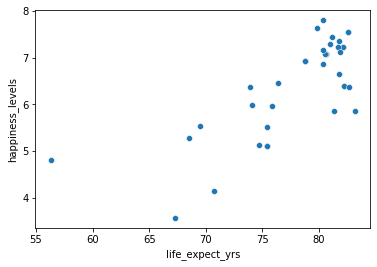

In [42]:
sns.scatterplot(data=data_df, x='life_expect_yrs', y='happiness_levels')

You can see a clear correlation between life expectancy and happiness!

Since the happiness_levels column is the last column, I will see if there are any outliers in this column. I will use the mean absolute error method to reduce the outlier effect on the dataset.

In [43]:
data = data_df.values
data[:, 1:]
#data[:, -1]

array([[1, 1858.0, 1.92, 20.4, 81.2, 30.93, 1434.0, 422, 1048, 34.9,
        7.44],
       [2, 2636.0, 1.48, 29.0, 82.1, 26.86, 1712.0, 406, 1103, 41.66,
        7.22],
       [3, 1884.0, 1.94, 20.1, 81.0, 17.33, 1501.0, 132, 1008, 25.74,
        7.29],
       [4, 1821.0, 1.72, 20.6, 81.8, 19.63, 1452.0, 129, 598, 37.31,
        7.35],
       [5, 1630.0, 2.19, 19.7, 79.8, 21.24, 1380.0, 154, 523, 32.53,
        7.64],
       [6, 1662.0, 1.6, 22.2, 80.4, 13.08, 1540.0, 113, 309, 35.23, 7.8],
       [8, 1626.0, 1.55, 22.3, 80.6, 39.41, 1386.0, 254, 1729, 26.11,
        7.07],
       [9, 2591.0, 1.19, 23.8, 82.2, 65.19, 1686.0, 585, 2344, 37.8, 6.4],
       [10, 1938.0, 1.08, 29.4, 81.7, 24.26, 1670.0, 218, 788, 31.04,
        7.23],
       [11, 2363.0, 1.57, 29.0, 82.1, 25.9, 1712.0, 243, 813, 36.89,
        7.22],
       [12, 2671.0, 0.26, 6.2, 75.4, 85.43, 1832.0, 223, 261, 38.62,
        5.12],
       [13, 2624.0, 0.22, 10.0, 74.1, 76.64, 2137.0, 377, 1796, 50.03,
        5.99],
     

In [44]:
data = data_df.values
# split into input and output elements
X, y = data[:, 1:-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.425


In [45]:
data = data_df.values
X, y = data[:, 1:-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(28, 10) (28,)
(26, 10) (26,)
MAE: 0.397


So, since the mean absolute error increased, it seems the effect of the outliers was not reduced. Hmm...that means there has been a decrease in accuracy. This may be due to the terrible model we used earlier...

### Prompt 3: Feature Selection
* Graphical visualization of features
* Examine the relationships within the dataset - using 2 different methods
* Reduction of the dimensionality of the dataset

Since the features all had different ranges, I grouped them in 3 plots to group similar-range features together. You can see how the box and whisker plots differ from each other below.

<AxesSubplot:>

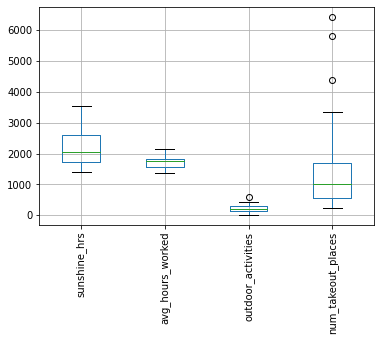

In [46]:
data_df.boxplot(['sunshine_hrs', 'avg_hours_worked', 'outdoor_activities', 'num_takeout_places'], rot=90)

<AxesSubplot:>

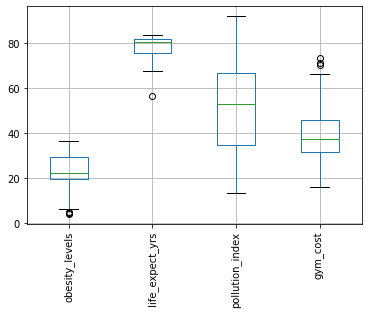

In [47]:
data_df.boxplot(['obesity_levels', 'life_expect_yrs', 'pollution_index', 'gym_cost'], rot=90)

<AxesSubplot:>

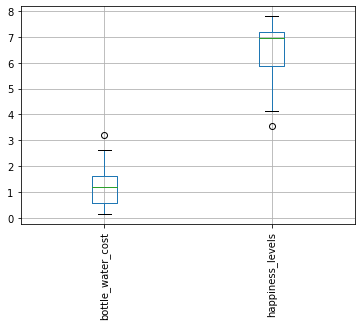

In [48]:
data_df.boxplot(['bottle_water_cost', 'happiness_levels'], rot=90)

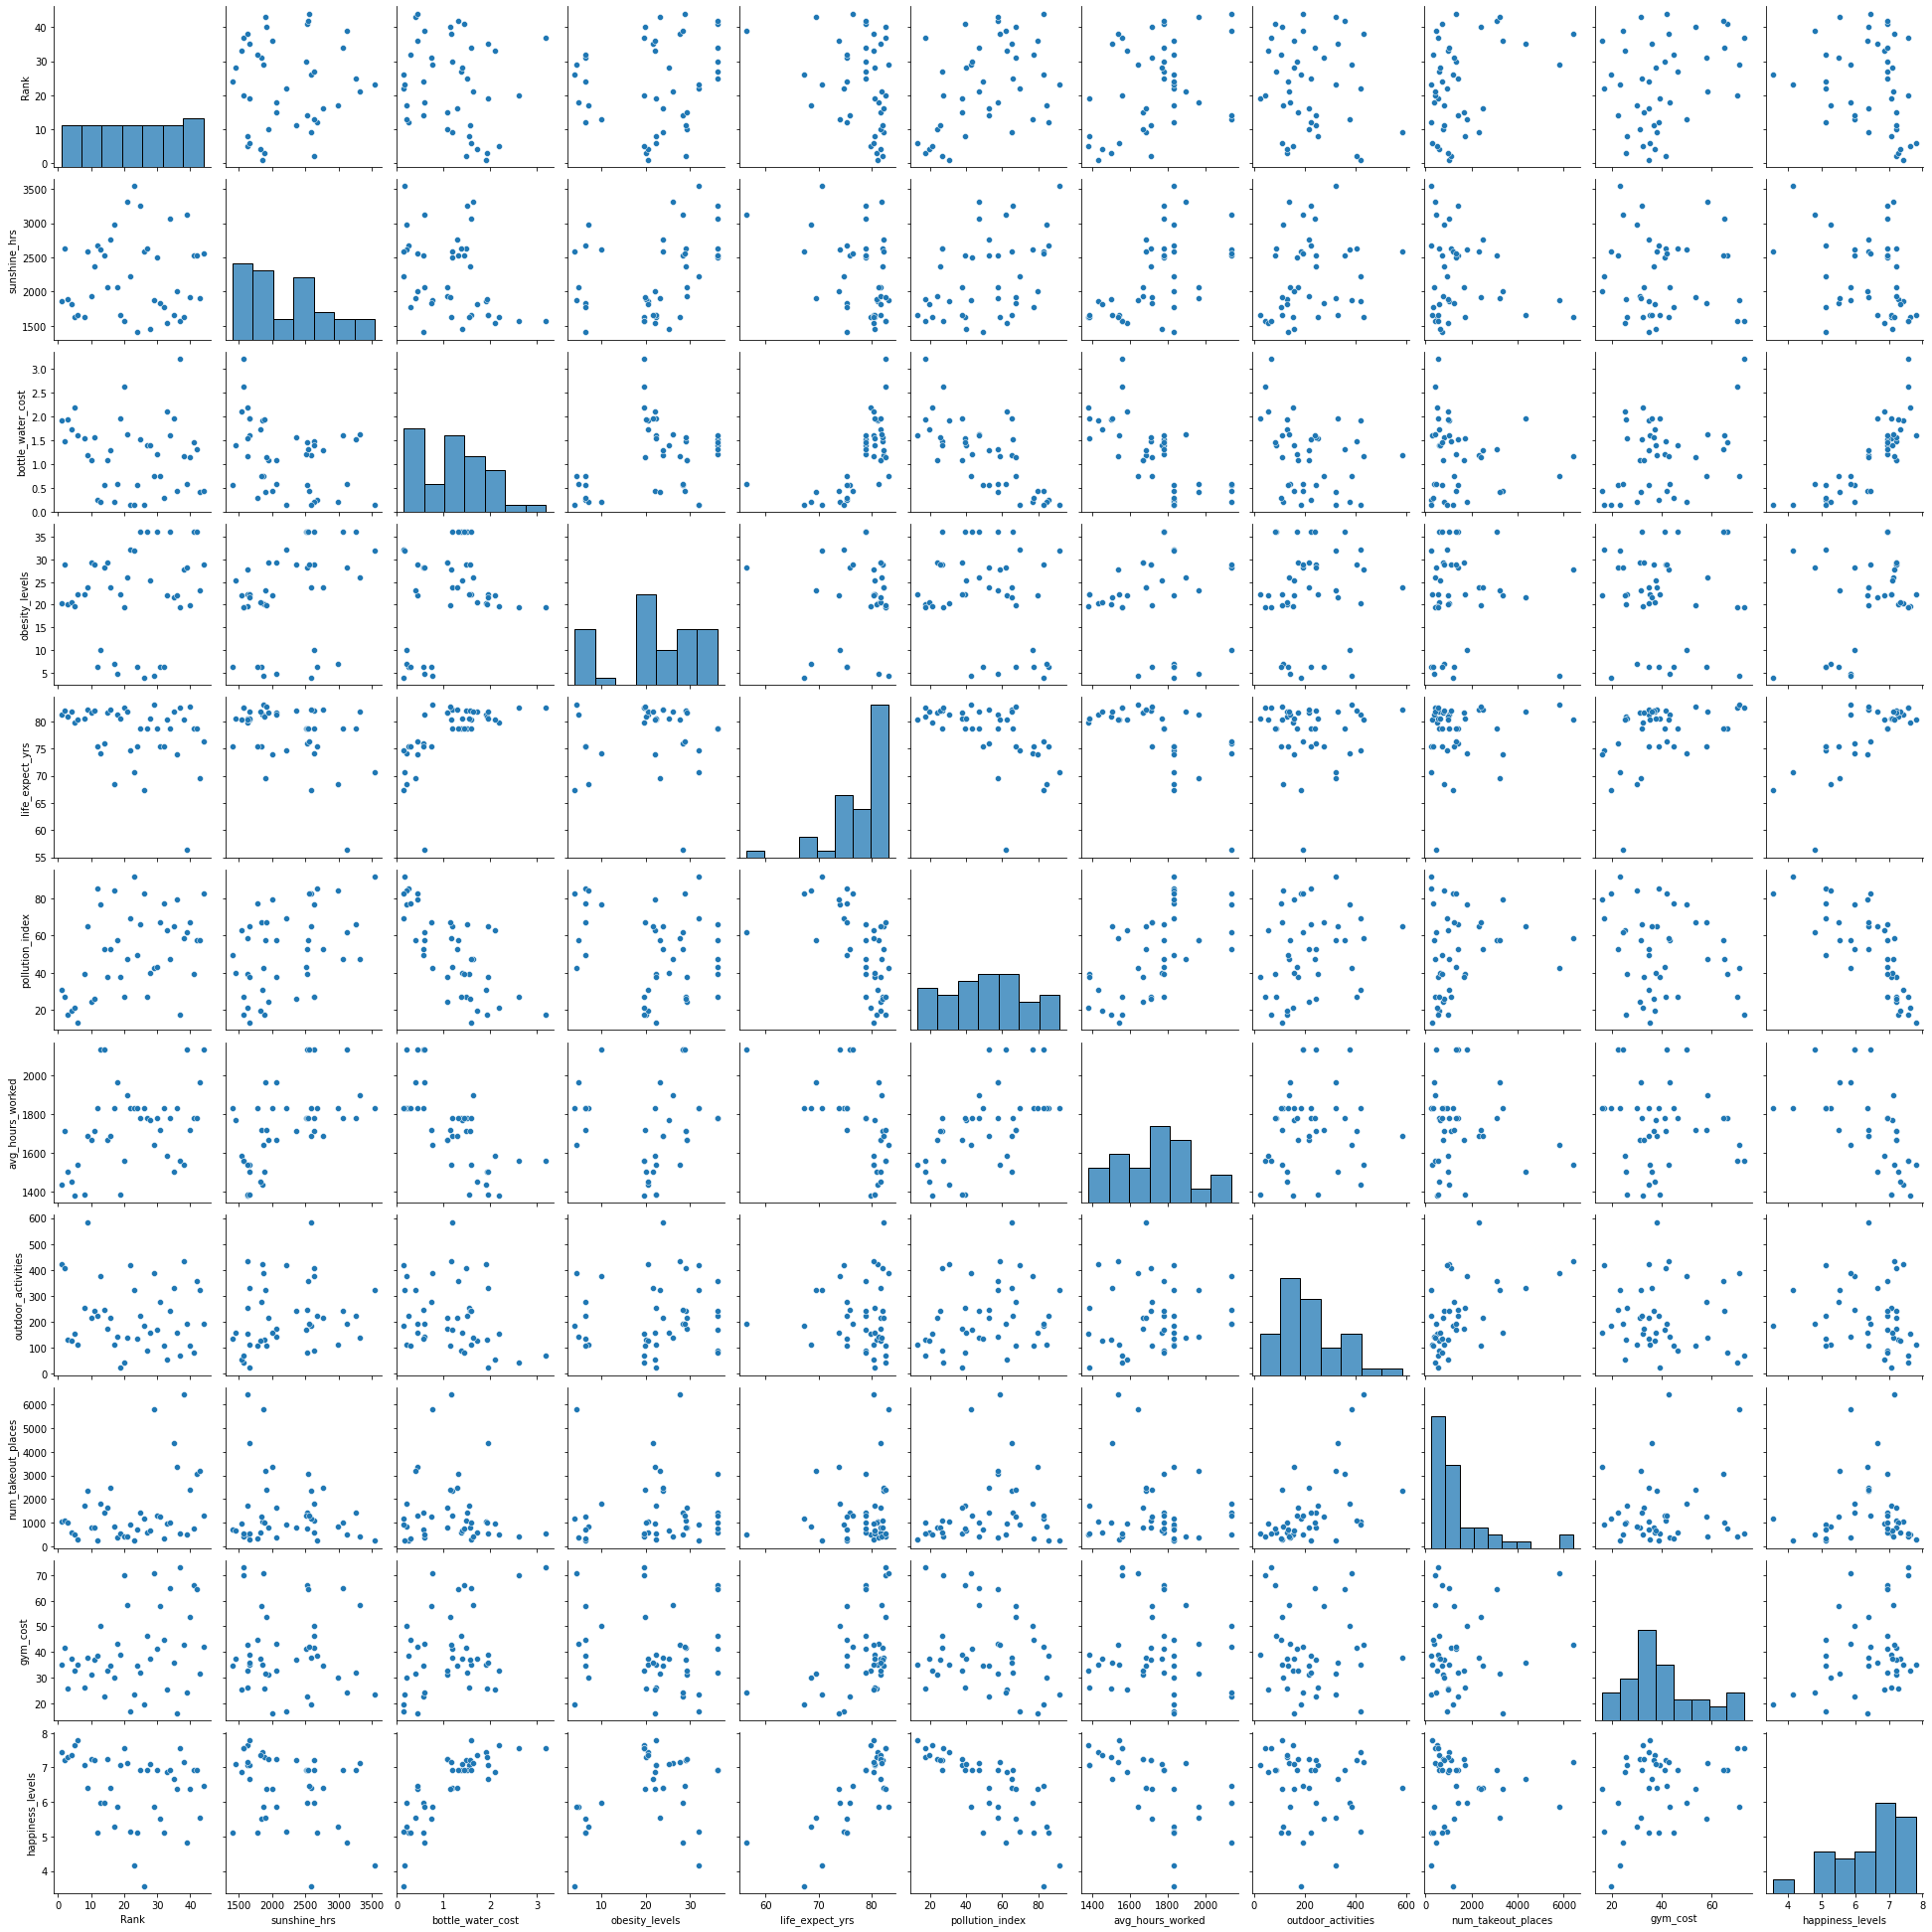

In [49]:
sns.pairplot(data_df)

Next I wanted to create a heatmap of the correlations between the variables. I also take it a step further and sort the correlations by which ones are most positive between happiness_levels and other features. 

In [50]:
corrmat = data_df.corr()
corrmat

,Rank,sunshine_hrs,bottle_water_cost,obesity_levels,life_expect_yrs,pollution_index,avg_hours_worked,outdoor_activities,num_takeout_places,gym_cost,happiness_levels
Rank,1.000000,0.041496,-0.160508,0.156132,-0.301275,0.427297,0.370327,-0.122384,0.352271,0.311411,-0.253738
sunshine_hrs,0.041496,1.000000,-0.374688,0.337700,-0.400598,0.412271,0.562782,0.200267,-0.175267,-0.050218,-0.347322
bottle_water_cost,-0.160508,-0.374688,1.000000,0.281698,0.633767,-0.735286,-0.704788,-0.286457,-0.099299,0.375971,0.811766
obesity_levels,0.156132,0.337700,0.281698,1.000000,0.136392,-0.256251,0.001597,0.098091,-0.010373,-0.030005,0.440548
life_expect_yrs,-0.301275,-0.400598,0.633767,0.136392,1.000000,-0.558713,-0.596225,-0.013609,0.145122,0.404191,0.748339
pollution_index,0.427297,0.412271,-0.735286,-0.256251,-0.558713,1.000000,0.572918,0.242622,0.187227,-0.244865,-0.765902
avg_hours_worked,0.370327,0.562782,-0.704788,0.001597,-0.596225,0.572918,1.000000,0.089447,-0.100054,-0.071081,-0.571663
outdoor_activities,-0.122384,0.200267,-0.286457,0.098091,-0.013609,0.242622,0.089447,1.000000,0.521406,-0.083967,-0.161151
num_takeout_places,0.352271,-0.175267,-0.099299,-0.010373,0.145122,0.187227,-0.100054,0.521406,1.000000,0.110514,0.024503
gym_cost,0.311411,-0.050218,0.375971,-0.030005,0.404191,-0.244865,-0.071081,-0.083967,0.110514,1.000000,0.316620


<function matplotlib.pyplot.show(close=None, block=None)>

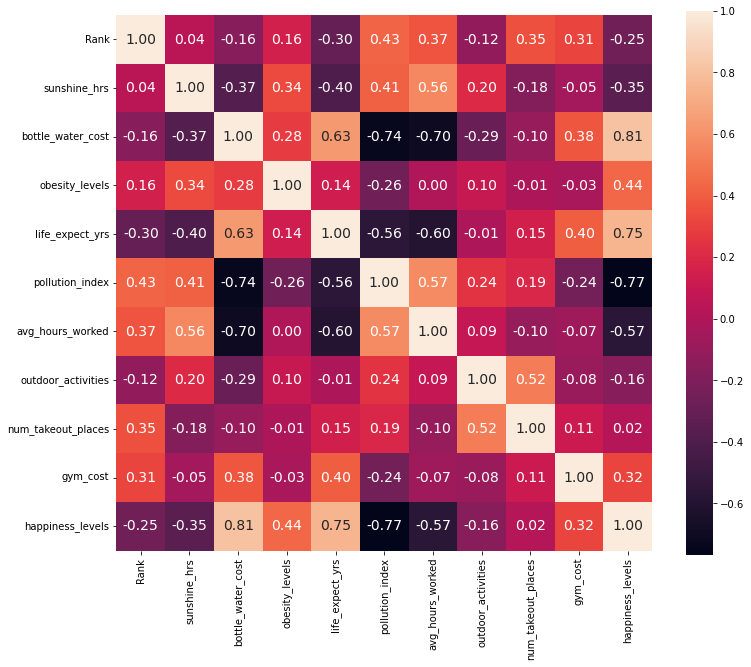

In [51]:
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

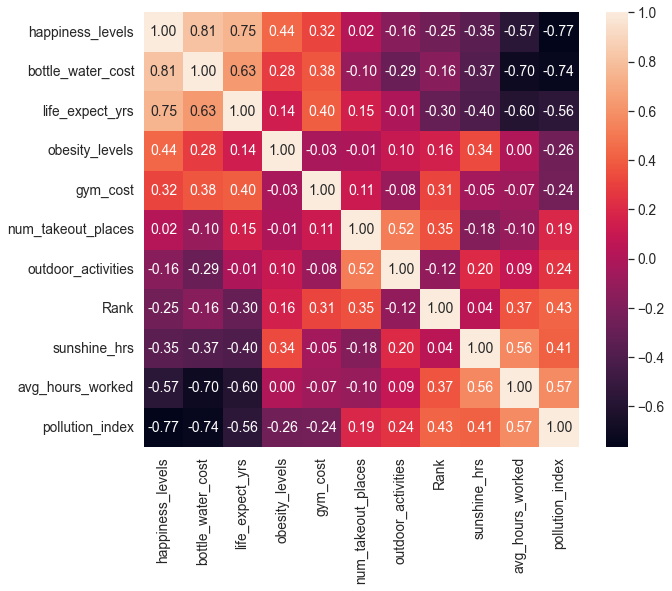

In [52]:
k = 15
cols = corrmat.nlargest(k, 'happiness_levels')['happiness_levels'].index

#Numpy corrcoef gives a pearson correlation coefficient
cm = np.corrcoef(data_df[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

Since polution index, average hours worked, outdoor activities, and Rank are the most negatively correlated with happiness_levels, I dropped these columns to reduce the dataset. I then created the same heatmaps with the new reduced dataset.

C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\3315944743.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop('pollution_index', 1)
C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\3315944743.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop('avg_hours_worked', 1)
C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\3315944743.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop('outdoor_activities', 1)
C:\Users\jerem\AppData\Local\Temp\ipykernel_2448\3315944743.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop('Rank', 1)


<function matplotlib.pyplot.show(close=None, block=None)>

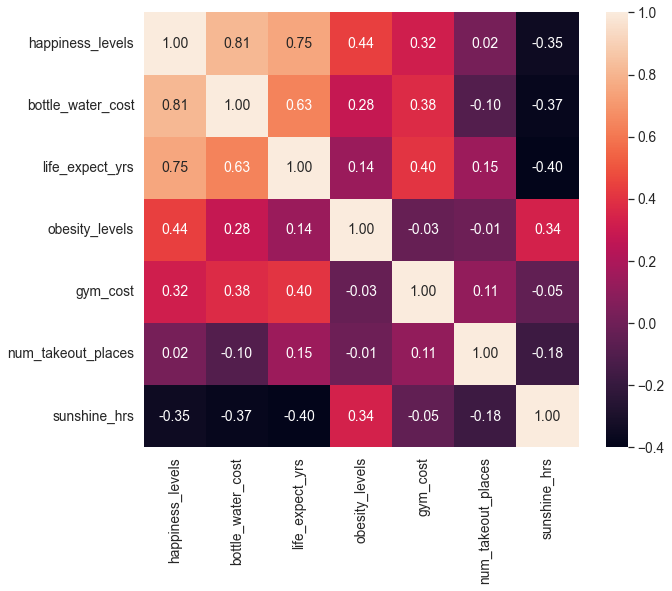

In [53]:
data_df = data_df.drop('pollution_index', 1)
data_df = data_df.drop('avg_hours_worked', 1)
data_df = data_df.drop('outdoor_activities', 1)
data_df = data_df.drop('Rank', 1)
corrmat = data_df.corr()
k = 10
cols = corrmat.nlargest(k, 'happiness_levels')['happiness_levels'].index

#Numpy corrcoef gives a pearson correlation coefficient
cm = np.corrcoef(data_df[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

### Prompt 4: Insights and Findings
* Describe an insight and/or findings from within the dataset.

It's really interesting! According the this dataset, a few odd findings could be stated. First, the amount of hours of sunshine is actually negatively correlated with happiness levels. This is extremely counterintuitive, as sunshine has been associated with a higher happiness level typically. Interesting. Additionally, the cost of bottled water was positively associated with happiness levels. I believe this is a misleading correlation and doesn't tell a complete picture. If this is true, this means that the more expensive water is, the happier people are. This is definitely not true as typically people are happiest when their expenses are lowest, by logic.

However, it's straightforward that happiness levels is correlated postively with life expectancy. When people are happier, they live longer. This makes sense.

### Prompt 5: Bonus: Feature Engineering
* Create a new feature based for findings

I chose to create the feature "life per sunshine" which takes the person's average life expectancy and divides it by the amount of hours of sunshine this person gets in this location. This may tell us something interesting about how big of a percentage the person's life is filled with sunshine compared to other locations, and how this may correlate to a higher happiness level.

In [54]:
data_df['life_per_sunshine'] = data_df.life_expect_yrs / data_df.sunshine_hrs

<function matplotlib.pyplot.show(close=None, block=None)>

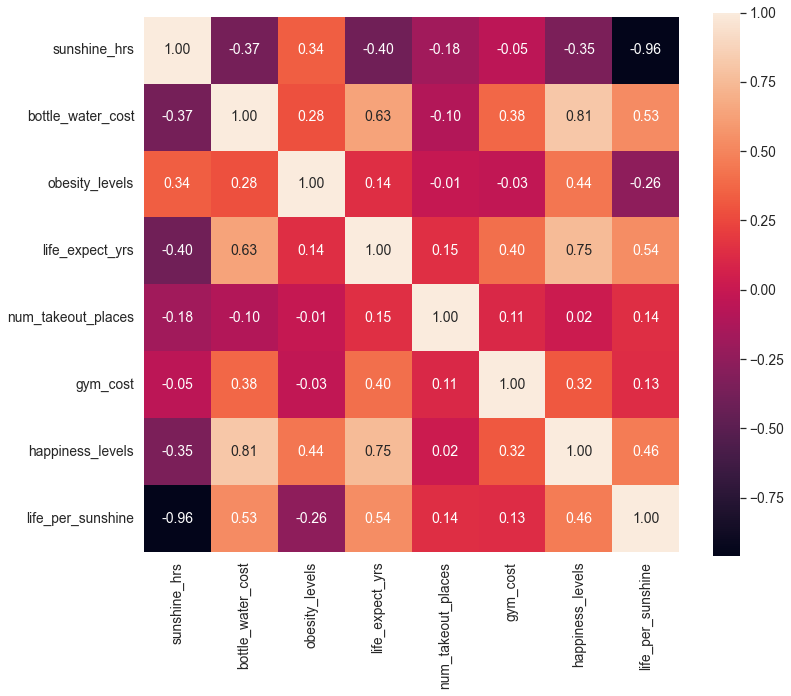

In [55]:
corrmat = data_df.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

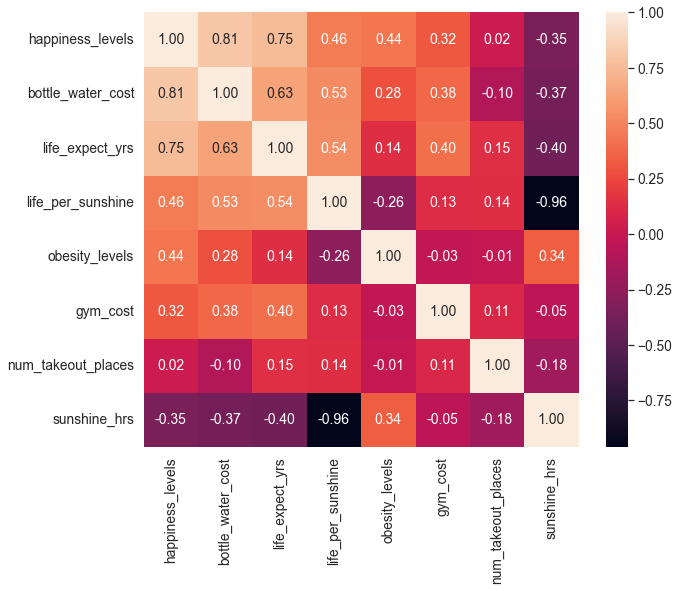

In [56]:
k = 14
cols = corrmat.nlargest(k, 'happiness_levels')['happiness_levels'].index

#Numpy corrcoef gives a pearson correlation coefficient
cm = np.corrcoef(data_df[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

# V. Conclusion

In this week's assignment, I cleaned and summarized the "Healthy Lifestyle Cities Report 2021" dataset and sought to explore how different factors may contribute towards a person's happiness. I found that while life expectancy was positively correlated with happiness, hours of sunshine was negatively correlated. I also found that the most expensive water was, the happier people were. This was puzzling. However, I still found the assignment interesting and challenging as cleaning the dataset is something I don't have much experience with. I was glad to have some examples to follow from Professor Hayes.

# VI. References

https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021

MSDS 650 - Week 2 Content:

1.) "Healthy Lifestyle Cities Report 2021" dataset downloaded for this assignment: healthy_lifestyle_city_2021_clean04.csv
https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021

2.) From the Experts PDF: Week 3
